In [40]:
'''
Python module for Algorithms - Proyecto Final. (Grupo 2)
'''
#Libraries
from collections import deque
from collections import defaultdict
import random
from random import randint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [3]:
URL_CSV = "https://raw.githubusercontent.com/dgalindoca/Algoritmos_2022_2/main/Grupo%202/Proyecto%20Final/500%20estaciones.csv"

In [4]:
"""
Dijkstra's algorithm for Directed Acyclic Graphs
"""

INFTY = float("inf")


class WeightedGraph:
    """
    DAG representation:
    a_node: adjacent node

    my_DAG = {node:{a_node1: weight of edge (node, a_node1),
                    a_node2: weight of edge (node, a_node2),
                    ...
                    },
              ...
              }
    """
    def __init__(self, graph_dict):
        self.graph = graph_dict
        self.unprocessed = None
        self.cost = None
        self.parent = None

    
    def __str__(self):
        return str(self.graph)
        

    def initialize_path_search(self, start_node):
        self.unprocessed = set(self.graph.keys())
        self.unprocessed.remove(start_node)
        self.cost = dict.fromkeys(self.unprocessed, INFTY)
        self.parent = dict.fromkeys(self.unprocessed, None)
        

    def get_cheapest_node(self):
        cheapest = INFTY
        cheapest_node = None
        for node in self.unprocessed:
            if self.cost[node] < cheapest:
                cheapest = self.cost[node]
                cheapest_node = node
        return cheapest_node
        

    def get_shortest_path(self, a, b):
        self.initialize_path_search(a)

        for adjacent_node in self.graph[a]:
            self.cost[adjacent_node] = self.graph[a][adjacent_node]
            self.parent[adjacent_node] = a
        
        while len(self.unprocessed) > 0:
            cheapest_node = self.get_cheapest_node()
            if cheapest_node == b or cheapest_node == None:
                break
            for adjacent_node in self.graph[cheapest_node]:
                if adjacent_node in self.unprocessed:
                    new_cost = self.cost[cheapest_node] + self.graph[cheapest_node][adjacent_node]
                    if self.cost[adjacent_node] > new_cost:
                        self.cost[adjacent_node] = new_cost
                        self.parent[adjacent_node] = cheapest_node
            self.unprocessed.remove(cheapest_node)

        return self.parent


"""
weighted_graph = {1:{2:6, 3:2},
                  2:{4:4},
                  3:{2:1, 4:8},
                  4:{}}

a = WeightedGraph(weighted_graph)
print(a)
print(a.get_shortest_path(4, 1))

weighted_graph2 = {1:{2:5, 3:2},
                   2:{4:4, 5:2},
                   3:{2:8, 5:7},
                   4:{5:6, 6:3},
                   5:{6:1},
                   6:{}}

b = WeightedGraph(weighted_graph2)
print(b.get_shortest_path(2, 6))
"""

'\nweighted_graph = {1:{2:6, 3:2},\n                  2:{4:4},\n                  3:{2:1, 4:8},\n                  4:{}}\n\na = WeightedGraph(weighted_graph)\nprint(a)\nprint(a.get_shortest_path(4, 1))\n\nweighted_graph2 = {1:{2:5, 3:2},\n                   2:{4:4, 5:2},\n                   3:{2:8, 5:7},\n                   4:{5:6, 6:3},\n                   5:{6:1},\n                   6:{}}\n\nb = WeightedGraph(weighted_graph2)\nprint(b.get_shortest_path(2, 6))\n'

In [8]:
def readcsv():
  """
  It reads the csv file and creates the graph stored.
  Structure of the graph:
  Dictionary of lists:
  - Each key is the 'source' node
  - Each list is a list of dictionaries
  - Each dictionary has the following keys:
    - Target (neighbour)
    - Weight
    - id
    - Type of connection
  :return: A dictionary of lists. The graph.
  """
  graph_file = urlopen(URL_CSV)
  graph_text = graph_file.read().decode('utf-8')
  graph_lines = graph_text.split('\n')
  graph_lines.pop(0)

  # Dictionary of lists.
  # Each key is the 'source' node
  # Each list is a list of dictionaries
  # Each dictionary has the following keys:
  # Target (neighbour)
  # Weight
  # id
  # Type of connection
  answer_graph = {} 
  for i in range(502):
    answer_graph[i] = []
  
  for line in graph_lines:
    actual_line = line.split(',')
    actual_connection_one = {}
    actual_connection_one['target'] = int(actual_line[1])
    actual_connection_one['type'] = actual_line[2]
    actual_connection_one['id'] = actual_line[3]
    actual_connection_one['weight'] = int(actual_line[4])
    answer_graph[int(actual_line[0])].append(actual_connection_one)
    actual_connection_two = {}
    actual_connection_two['target'] = int(actual_line[0])
    actual_connection_two['type'] = actual_line[2]
    actual_connection_two['id'] = actual_line[3]
    actual_connection_two['weight'] = int(actual_line[4])
    answer_graph[int(actual_line[1])].append(actual_connection_two)
  return answer_graph

In [10]:
def select_random_nodes(graph, number_of_nodes):
  """
  The function takes in a graph and a number of nodes, and returns
  a list of randomly selected nodes from the graph.
  
  :param graph: the graph we're working with
  :param number_of_nodes: The number of nodes to select from the graph
  :return: A list of random nodes from the graph.
  """
  graph_keys = graph.keys()
  selected = random.sample(graph_keys, number_of_nodes)
  return selected

def select_random_nodes_from_range(graph, number_of_nodes, min_element, max_element):
  """
  It takes a graph, a number of nodes, and a range of nodes, and 
  returns a list of nodes randomly selected from that range. Note 
  that the range needs to contain at least the same number of nodes
  as the parameter number_of_nodes. The range is inclusive.
  
  :param graph: the graph we're working with
  :param number_of_nodes: The number of nodes you want to select from the range
  :param min_element: the minimum node number to choose from
  :param max_element: the maximum number of nodes to be selected
  :return: A list of random numbers between min and max
  """
  graph_keys = graph.keys()
  min_of_keys = min(graph_keys)
  max_of_keys = max(graph_keys)
  if min_element < min_of_keys:
    min_element  = min_of_keys
  if max_element > max_of_keys:
    max_element = max_of_keys
  choose_from = [i for i in range(min_element, max_element + 1)]
  selected = random.sample(choose_from, number_of_nodes)
  return selected

def get_neighbours(graph, node):
  """
  It takes a graph and a node, and returns a list of all the nodes that 
  are connected to the given node.
  
  :param graph: the graph we're working with
  :param node: the node we're looking at
  :return: A list of the neighbours of the node.
  """
  neighbours = []
  node_information = graph[node]
  for connection in node_information:
    neighbours.append(connection['target'])
  return neighbours

def bfs(ugraph, start_node):
  """
  It takes a graph and a starting node and returns a set of all the nodes 
  that are visited and a dictionary of all the routes that are taken
  
  :param ugraph: the undirected graph
  :param start_node: the node we want to start the search from
  :return: A tuple with two elements. The first element is a set of all the
  nodes that are visited. The second element is a dictionary with the shortest 
  path from the start node to each node.
  """
  queue = deque([])
  routes = {}
  routes[start_node] = [start_node]
  visited = [start_node]
  queue.append(start_node)
  while queue != deque([]):
    temp_node = queue.popleft()
    for neighbor_node in ugraph[temp_node]:
      if neighbor_node not in visited:
        visited.append(neighbor_node)
        queue.append(neighbor_node)
        actual_route = routes[temp_node].copy()
        actual_route.append(neighbor_node)
        routes[neighbor_node] = actual_route
  return (set(visited), routes)

def dfs(graph, start, visited = None, routes = None):
  """
  We start at the start node, and then we visit all the nodes that are connected 
  to it, and then we visit all the nodes that are connected to those nodes, and so on.
  
  Parameters
  ----------
  ugraph : dict
    Representation of a graph.
  start_node : node
    Start node for the BFS search.

  Returns
  -------
  Set
    Set of explored nodes in the BFS search algorithm.
  routes : dict
    Dictionary of the routes from the start node to the key node
  """
  if visited is None:
    visited = set()
  if routes is None:
    routes = {}
    routes[start] = [start]
  visited.add(start)
  for next in graph[start]:
    if next not in visited:
      actual_route = routes[start].copy()
      actual_route.append(next)
      routes[next] = actual_route
      dfs(graph, next, visited, routes)
  return (visited, routes)

def dijkstra(weighted_graph, start_node, end_node=INFTY):
  graph = WeightedGraph(weighted_graph)
  path_dict = graph.get_shortest_path(start_node, end_node)
  #print(path_dict)
  return path_dict

def read_dijkstra_path(paths, start_node, end_node):
  prev_node = end_node
  path = []
  while prev_node != start_node and prev_node != None:
    path = [prev_node] + path
    prev_node = paths[prev_node]
  if prev_node == start_node:
    return [prev_node] + path
  return None

def read_dijkstra_path_weight(graph, paths, start_node, end_node, preprocessed_path=None):
  if preprocessed_path != None:
      path = preprocessed_path
  else:
      path = read_dijkstra_path(paths, start_node, end_node)
  if path != None:
    total_weight = 0
    for index in range(len(path)-1):
      total_weight += graph[path[index]][path[index+1]]
    return total_weight
  return None

def copy_wgraph(wgraph):
    new_graph = {}
    for node_1 in wgraph:
        new_graph[node_1] = {}
        for node_2 in wgraph[node_1]:
            new_graph[node_1][node_2] = wgraph[node_1][node_2]
    return new_graph


def weights_sum(graph):
    sum = 0
    for node1 in graph:
        for node2 in graph[node1]:
            if node1 < node2:
                sum += graph[node1][node2]
    return sum

def  sim_use(graph, num_iterations):

    errors = [0]*num_iterations
    ugraph = copy_wgraph(graph)

    for iteration in range(num_iterations):
        paths = []
        total_weight = 0
        for node_1 in ugraph:
            ugraph_paths = dijkstra(ugraph, node_1)
            for node_2 in ugraph:
                if node_1 < node_2:
                    path = read_dijkstra_path(ugraph_paths, node_1, node_2)
                    if path != None and len(path) > 1:
                        paths += [path]
                        total_weight += read_dijkstra_path_weight(ugraph, ugraph_paths, node_1, node_2, path)
        error = total_weight/weights_sum(ugraph)
        errors[iteration] = error
        #print(paths[0:10])
        #print(error, total_weight)

        for path in paths:
            for i in range(len(path)-1):
                ugraph[path[i]][path[i+1]] += 1
                ugraph[path[i+1]][path[i]] += 1
    
    paths_dict = {}
    for node_1 in ugraph:
        paths_dict[node_1] = {}
        for node_2 in ugraph:
            paths_dict[node_1][node_2] = None

    for path in paths:
        paths_dict[path[0]][path[-1]] = path
        paths_dict[path[-1]][path[0]] = path

    return (paths_dict, errors)


def get_all_dijkstra_paths(wgraph):
    paths_dict = {}
    for node_1 in wgraph:
        paths_dict[node_1] = {}
        for node_2 in wgraph:
            paths_dict[node_1][node_2] = None

    for node_1 in wgraph:
        wgraph_paths = dijkstra(wgraph, node_1)
        for node_2 in wgraph:
            if node_1 < node_2:
                path = read_dijkstra_path(wgraph_paths, node_1, node_2)
                if path != None and len(path) > 1:
                    paths_dict[node_1][node_2] = path
                    paths_dict[node_2][node_1] = path

    return paths_dict

def get_edge_frequencies(graph, path_dict):
    edge_count = {}
    for node_1 in graph:
        edge_count[node_1] = {}
        for node_2 in graph:
            edge_count[node_1][node_2] = 0
    for node_1 in graph:
        for node_2 in graph:
            if node_1 < node_2 and path_dict[node_1][node_2] != None:
                for i in range(len(path_dict[node_1][node_2])-1):
                    edge_count[path_dict[node_1][node_2][i]][path_dict[node_1][node_2][i+1]] += 1
                    edge_count[path_dict[node_1][node_2][i+1]][path_dict[node_1][node_2][i]] += 1
    return edge_count
    

def convert_graph(graph_file):
  """
  It takes a graph in the form of a dictionary, and returns the graph without 
  the additional information in the form of a dictionary
  
  :param graph_file: a dictionary of the graph, where the keys are the nodes 
  and the values are the edges
  :return: A dictionary with the keys being the nodes and the values being a 
  list of the nodes that the key node is connected to.
  """
  graph = {}
  for i in graph_file.keys():
    graph[i] = []
  for i in graph_file.keys():
    for j in graph_file[i]:
      graph[i].append(j['target'])
  return graph

def convert_graph_to_simple_weighted(graph_file):
  """
  It takes a graph in the form of a dictionary of dictionaries and returns 
  a graph in the form of a dictionary of dictionaries, but with the weights
  of the edges being the values of the inner dictionaries and no more information.
  
  :param graph_file: the graph file
  :return: A dictionary of dictionaries.
  """
  graph = {}
  for i in graph_file.keys():
    graph[i] = {}
  for i in graph_file.keys():
    for j in graph_file[i]:
      graph[i][j['target']] = j['weight']
  return graph

In [18]:
"""
  File reading and convertion
"""
graph_file = readcsv()
my_graph = convert_graph(graph_file)
print(my_graph)
# print(dfs(graph,2))

{0: [18], 1: [18], 2: [17], 3: [16, 15, 4], 4: [3], 5: [15, 14, 13], 6: [13, 7], 7: [6, 12], 8: [11, 9, 10], 9: [8, 10], 10: [8, 27, 26, 9, 25], 11: [8, 25, 24, 12, 31], 12: [7, 24, 11], 13: [6, 23, 5], 14: [22, 5], 15: [3, 21, 5], 16: [17, 3, 21], 17: [18, 20, 2, 16], 18: [0, 19, 1, 17], 19: [18, 36, 35], 20: [17, 35, 21], 21: [16, 15, 20, 34, 22], 22: [21, 33, 14], 23: [13, 33, 24], 24: [12, 11, 23, 31, 32], 25: [11, 27, 10, 42, 31], 26: [10, 28, 29], 27: [10, 25, 28], 28: [27, 26, 30], 29: [26, 46, 45], 30: [28, 45], 31: [11, 25, 24, 41], 32: [40, 24], 33: [22, 40, 23], 34: [21, 38, 40], 35: [20, 37, 19, 38], 36: [19, 37], 37: [36, 35, 47], 38: [35, 34], 39: [40, 49], 40: [33, 32, 34, 39, 48, 41, 53, 52], 41: [31, 40, 42, 53], 42: [25, 41, 55], 43: [55, 44], 44: [45, 43, 58], 45: [29, 30, 44, 46], 46: [29, 57, 45], 47: [49, 59, 37], 48: [49, 59, 40, 60, 50], 49: [39, 48, 47], 50: [48, 52], 51: [61, 62], 52: [50, 40, 61], 53: [40, 62, 63, 41], 54: [55, 56, 64], 55: [42, 43, 63, 54], 

In [12]:
"""
  ####################################################
  Path usage frequency comparison
  ####################################################
  
  Read graph, convert to weighted graph and set all weights to 1
"""
weight_1_file = readcsv()
weight_1_graph = convert_graph_to_simple_weighted(graph_file)

for node in weight_1_graph:
  for subnode in weight_1_graph[node]:
     weight_1_graph[node][subnode] = 1

In [13]:
"""
  Find the shortest path between any pair of nodes using dijkstra
  shortest_paths <- list of these paths
"""
shortest_paths = get_all_dijkstra_paths(weight_1_graph)

In [14]:
"""
  Find the optimal path according to the weights asociated to the
  frequency of usage of an edge, all of this using dijkstra
  simulation_paths <- list of these paths
"""
simulation_paths, simulation_errors = sim_use(copy_wgraph(weight_1_graph), 5)

In [15]:
"""
  Count the number of times each edge is used when all the paths 
  that connect every two nodes are considered, for the two sets of paths.
  
  Note that the edges that make up the
  path that connects a node a with a node b, are the same edges that
  connect node b with node a, since we are counting connections
  with no regar for the direction, these path-constructing edges are 
  counted only once for each connection.

  ef: edge frequencies
"""
shortest_paths_ef = get_edge_frequencies(weight_1_graph, shortest_paths)
simulation_paths_ef = get_edge_frequencies(weight_1_graph, simulation_paths)

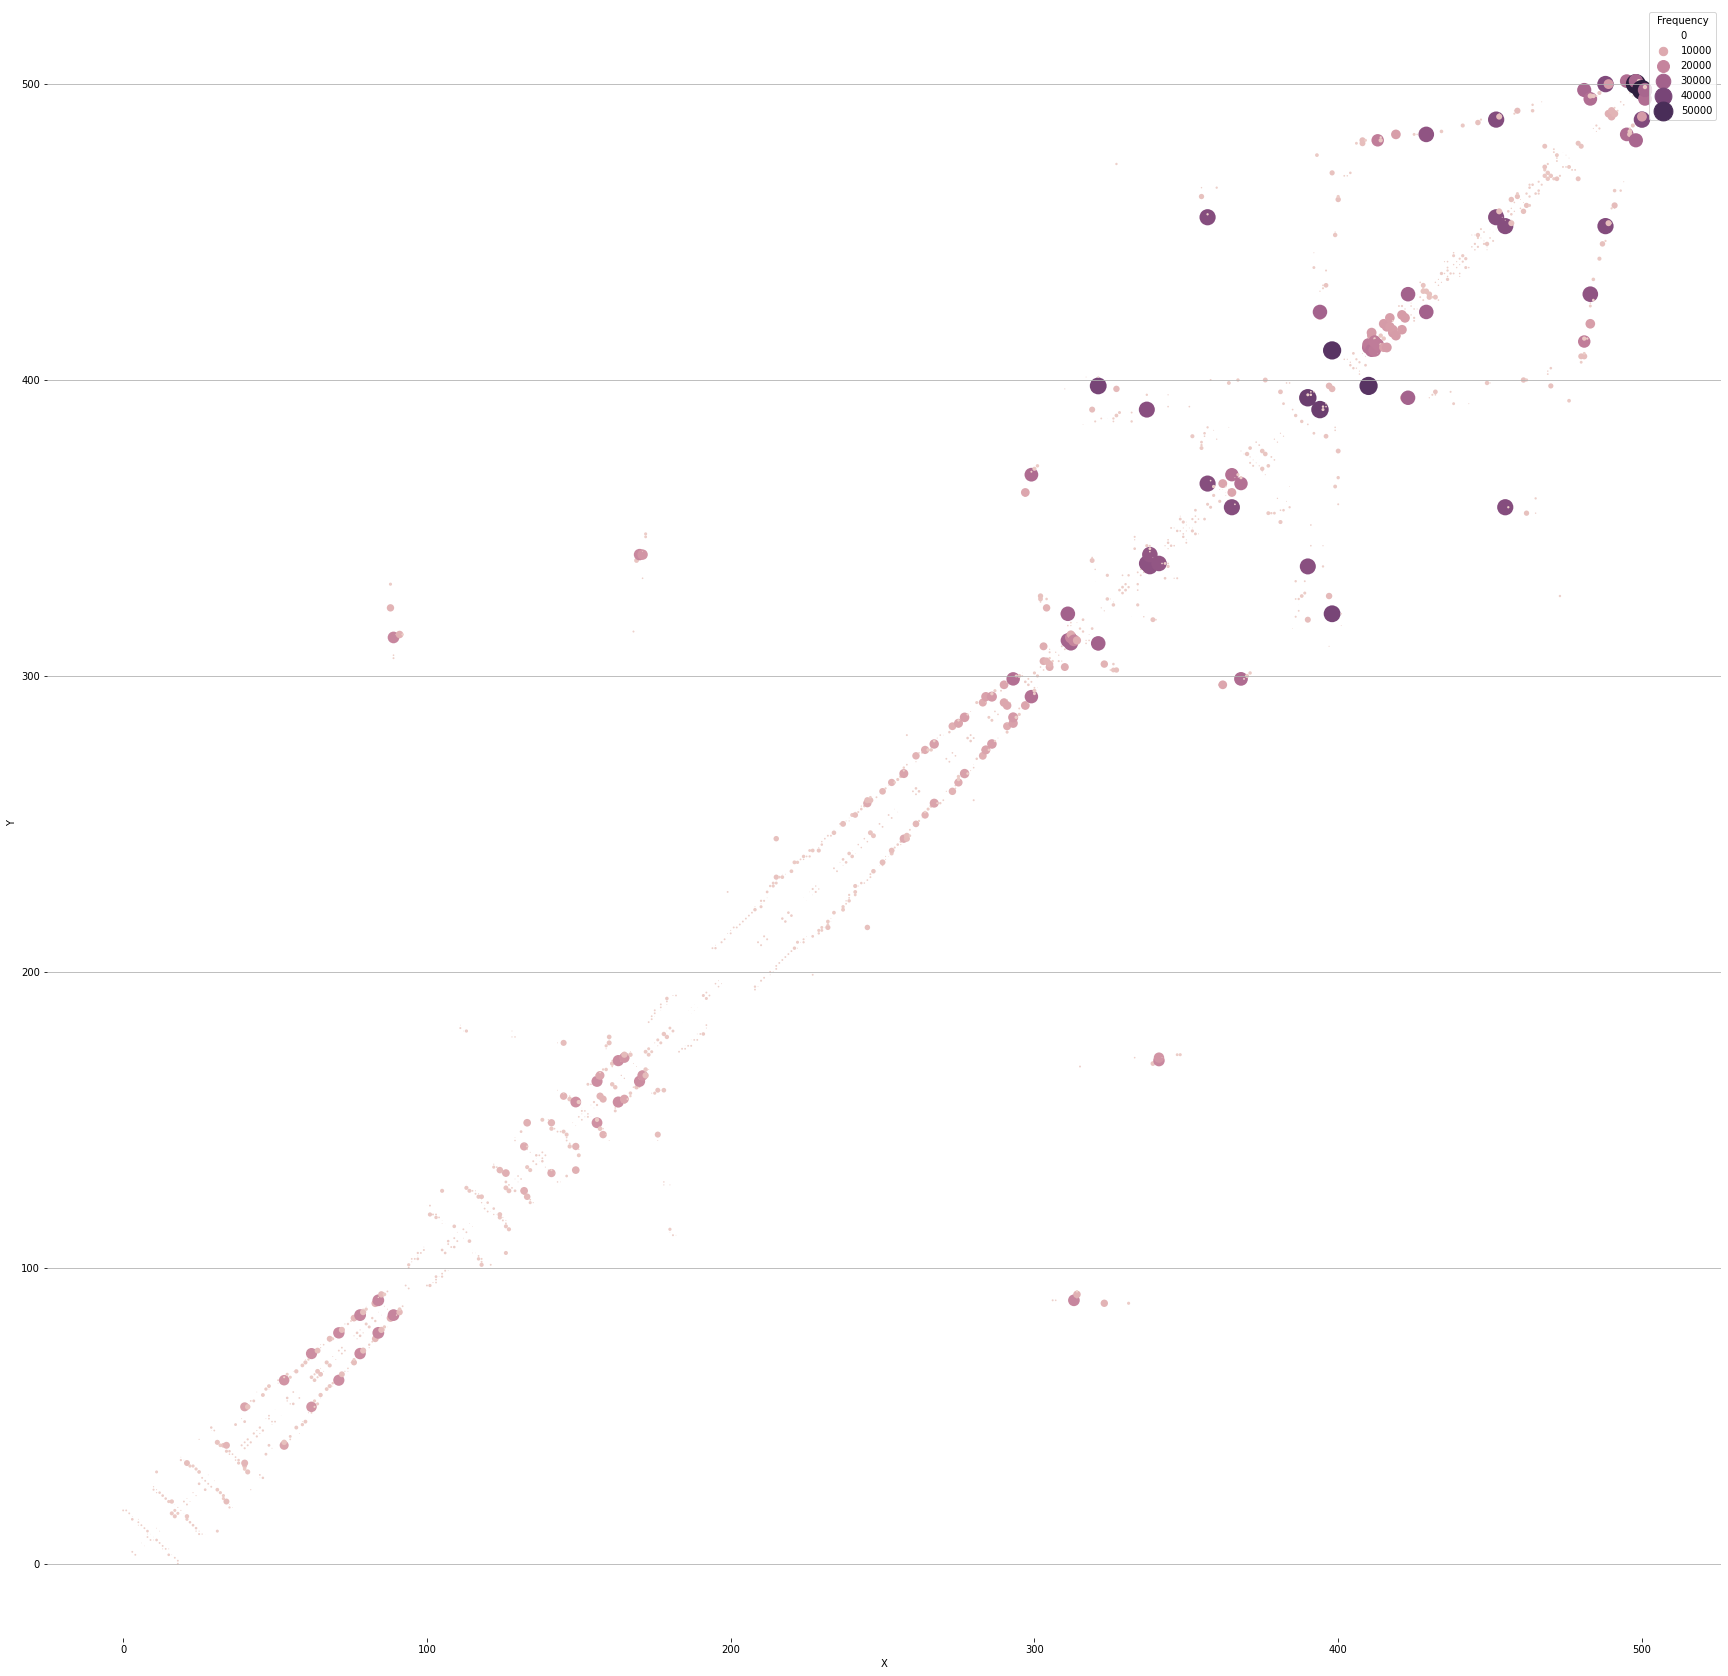

In [16]:
"""
  Plot for shortest_paths
"""
shortest_paths_plot_dict = {'X':[], 'Y':[], 'Frequency':[]}
for key in shortest_paths_ef:
    for key2 in shortest_paths_ef:
        shortest_paths_plot_dict['X'].append(key)
        shortest_paths_plot_dict['Y'].append(key2)
        shortest_paths_plot_dict['Frequency'].append(shortest_paths_ef[key][key2])
      
shortest_paths_df = pd.DataFrame(shortest_paths_plot_dict)

fig, ax = plt.subplots(figsize=(30, 30))
sns.scatterplot(x=shortest_paths_df['X'], 
                y=shortest_paths_df['Y'], 
                size=shortest_paths_df['Frequency'], 
                ax=ax, 
                sizes=(0, 400), 
                hue=shortest_paths_df['Frequency'])
ax.grid(axis='y')
sns.despine(left=True, bottom=True)

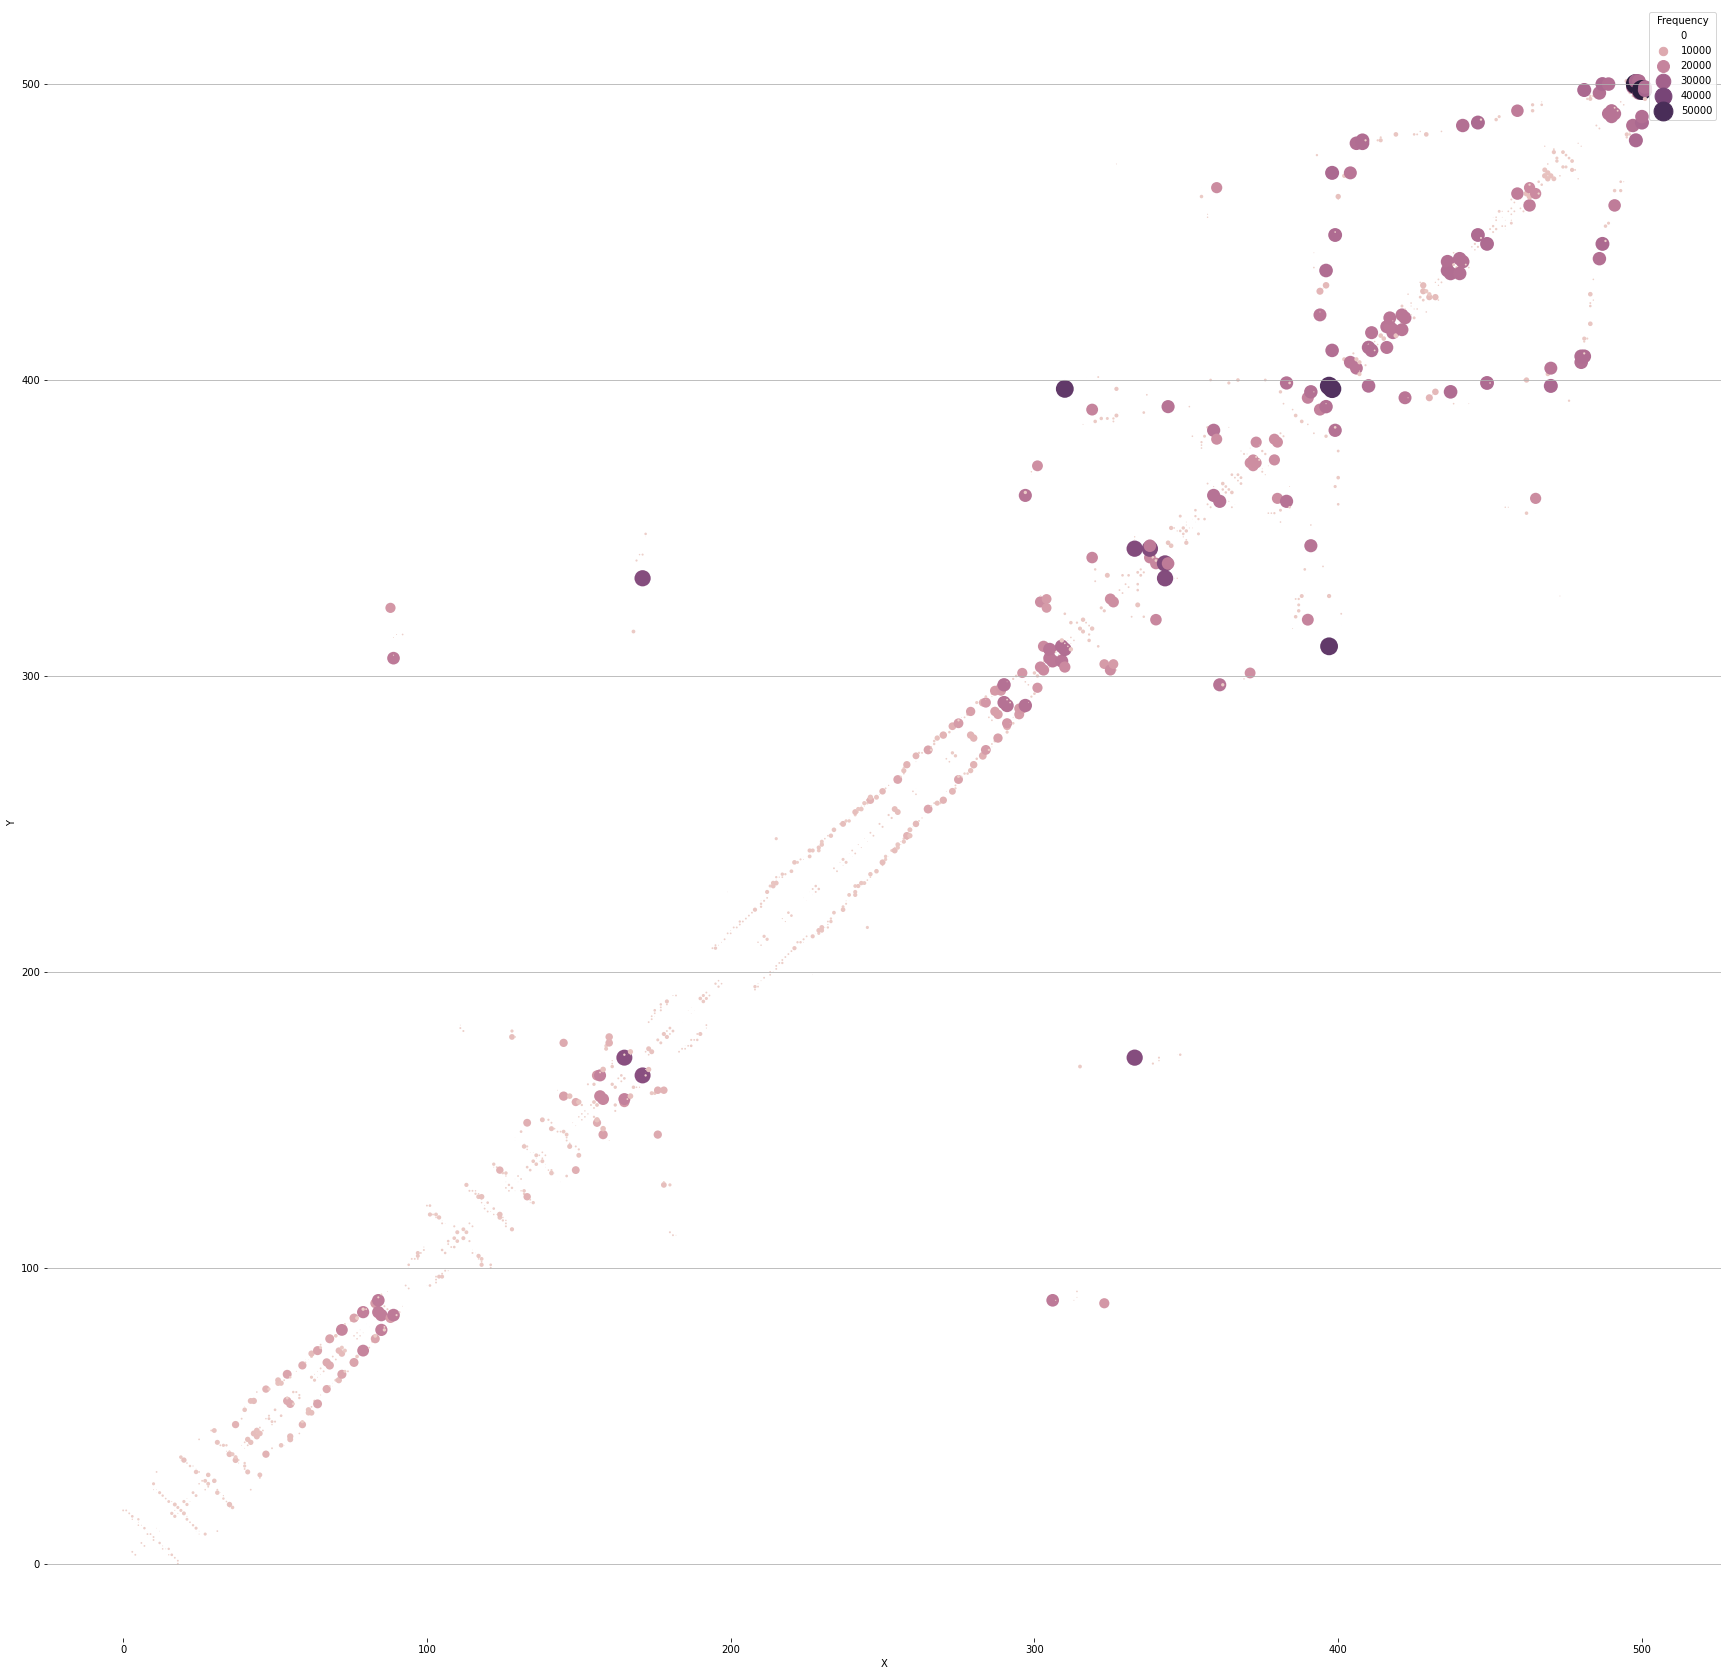

In [17]:
"""
  Plot for simulation_paths
"""
simulation_paths_plot_dict = {'X':[], 'Y':[], 'Frequency':[]}
for key in simulation_paths_ef:
    for key2 in simulation_paths_ef:
        simulation_paths_plot_dict['X'].append(key)
        simulation_paths_plot_dict['Y'].append(key2)
        simulation_paths_plot_dict['Frequency'].append(simulation_paths_ef[key][key2])
      
simulation_paths_df = pd.DataFrame(simulation_paths_plot_dict)

fig, ax = plt.subplots(figsize=(30, 30))
sns.scatterplot(x=simulation_paths_df['X'], 
                y=simulation_paths_df['Y'], 
                size=simulation_paths_df['Frequency'], 
                ax=ax, 
                sizes=(0, 400), 
                hue=simulation_paths_df['Frequency'])
ax.grid(axis='y')
sns.despine(left=True, bottom=True)

## Test de distancias
1. Tier 3 a tier 3:

  a. Entre 0 y 100 a 101 y 200

  b. Entre 0 y 100 a 201 y 300
2. Tier 3 a Tier 1:

  c. Entre 0 y 100 a 401 y 501

In [23]:
"""
Read csv and build graphs
"""
weight_1_file = readcsv()
my_graph = convert_graph(weight_1_file)
weight_graph = convert_graph_to_simple_weighted(graph_file)
print(my_graph)
print(weight_graph)

{0: [18], 1: [18], 2: [17], 3: [16, 15, 4], 4: [3], 5: [15, 14, 13], 6: [13, 7], 7: [6, 12], 8: [11, 9, 10], 9: [8, 10], 10: [8, 27, 26, 9, 25], 11: [8, 25, 24, 12, 31], 12: [7, 24, 11], 13: [6, 23, 5], 14: [22, 5], 15: [3, 21, 5], 16: [17, 3, 21], 17: [18, 20, 2, 16], 18: [0, 19, 1, 17], 19: [18, 36, 35], 20: [17, 35, 21], 21: [16, 15, 20, 34, 22], 22: [21, 33, 14], 23: [13, 33, 24], 24: [12, 11, 23, 31, 32], 25: [11, 27, 10, 42, 31], 26: [10, 28, 29], 27: [10, 25, 28], 28: [27, 26, 30], 29: [26, 46, 45], 30: [28, 45], 31: [11, 25, 24, 41], 32: [40, 24], 33: [22, 40, 23], 34: [21, 38, 40], 35: [20, 37, 19, 38], 36: [19, 37], 37: [36, 35, 47], 38: [35, 34], 39: [40, 49], 40: [33, 32, 34, 39, 48, 41, 53, 52], 41: [31, 40, 42, 53], 42: [25, 41, 55], 43: [55, 44], 44: [45, 43, 58], 45: [29, 30, 44, 46], 46: [29, 57, 45], 47: [49, 59, 37], 48: [49, 59, 40, 60, 50], 49: [39, 48, 47], 50: [48, 52], 51: [61, 62], 52: [50, 40, 61], 53: [40, 62, 63, 41], 54: [55, 56, 64], 55: [42, 43, 63, 54], 

In [34]:
"""
Test 1a
"""

node_start = select_random_nodes_from_range(my_graph, 1, 0, 100)[0]
node_finish = select_random_nodes_from_range(my_graph, 1, 101, 200)[0]


visited, paths_dfs = dfs(my_graph, node_start)
path_dfs = paths_dfs[node_finish]
visited, paths_bfs = bfs(my_graph, node_start)
path_bfs = paths_bfs[node_finish]
paths_djikstra = dijkstra(weight_graph, node_start, node_finish)

path_dijkstra = read_dijkstra_path(paths_djikstra, node_start, node_finish)
path_dijkstra_weight = read_dijkstra_path_weight(weight_graph, paths_djikstra, node_start, node_finish)

print("Starting node: ", node_start, " Ending node: ", node_finish)
print("DFS")
print("Length = ", len(path_dfs))
print(path_dfs)
print("BFS")
print("Length = ", len(path_bfs))
print(path_bfs)
print("Dijkstra")
print("Length = ", len(path_dijkstra))
print("Cost = ", path_dijkstra_weight)
print(path_dijkstra)

Starting node:  16  Ending node:  200
DFS
Length =  134
[16, 17, 18, 19, 36, 37, 35, 20, 21, 15, 5, 14, 22, 33, 40, 32, 24, 12, 11, 8, 9, 10, 27, 25, 42, 41, 53, 62, 51, 61, 52, 50, 48, 49, 47, 59, 67, 68, 60, 69, 70, 77, 76, 82, 83, 88, 84, 78, 71, 72, 73, 65, 66, 74, 81, 80, 87, 92, 314, 318, 317, 312, 313, 89, 306, 305, 309, 310, 321, 398, 397, 327, 302, 326, 304, 323, 322, 387, 324, 334, 331, 330, 329, 328, 389, 393, 476, 475, 472, 468, 479, 480, 406, 407, 403, 469, 470, 404, 405, 409, 481, 498, 500, 487, 446, 448, 450, 399, 364, 363, 361, 297, 290, 291, 281, 272, 271, 261, 250, 236, 237, 238, 224, 211, 212, 225, 239, 226, 227, 199, 213, 229, 214, 200]
BFS
Length =  37
[16, 21, 34, 40, 53, 62, 71, 78, 84, 89, 313, 312, 311, 321, 398, 410, 412, 413, 481, 498, 500, 488, 452, 455, 357, 365, 368, 299, 293, 284, 275, 266, 256, 243, 230, 214, 200]
Dijkstra
Length =  40
Cost =  64
[16, 21, 34, 40, 53, 62, 71, 78, 84, 89, 313, 312, 311, 321, 398, 410, 412, 414, 481, 498, 500, 488, 447, 448

In [35]:
"""
Test 1b
"""

node_start = select_random_nodes_from_range(my_graph, 1, 0, 100)[0]
node_finish = select_random_nodes_from_range(my_graph, 1, 201, 300)[0]


visited, paths_dfs = dfs(my_graph, node_start)
path_dfs = paths_dfs[node_finish]
visited, paths_bfs = bfs(my_graph, node_start)
path_bfs = paths_bfs[node_finish]
paths_djikstra = dijkstra(weight_graph, node_start, node_finish)

path_dijkstra = read_dijkstra_path(paths_djikstra, node_start, node_finish)
path_dijkstra_weight = read_dijkstra_path_weight(weight_graph, paths_djikstra, node_start, node_finish)

print("Starting node: ", node_start, " Ending node: ", node_finish)
print("DFS")
print("Length = ", len(path_dfs))
print(path_dfs)
print("BFS")
print("Length = ", len(path_bfs))
print(path_bfs)
print("Dijkstra")
print("Length = ", len(path_dijkstra))
print("Cost = ", path_dijkstra_weight)
print(path_dijkstra)

Starting node:  64  Ending node:  209
DFS
Length =  128
[64, 65, 57, 46, 29, 26, 10, 8, 11, 25, 27, 28, 30, 45, 44, 43, 55, 42, 41, 31, 24, 12, 7, 6, 13, 23, 33, 22, 21, 16, 17, 18, 19, 36, 37, 35, 38, 34, 40, 39, 49, 48, 59, 67, 68, 60, 69, 70, 62, 71, 72, 73, 81, 80, 87, 92, 314, 90, 84, 78, 77, 76, 82, 83, 88, 331, 330, 329, 334, 335, 336, 389, 393, 476, 475, 472, 468, 479, 480, 406, 407, 403, 469, 473, 327, 302, 303, 305, 309, 312, 317, 401, 321, 310, 397, 398, 470, 404, 405, 409, 481, 498, 500, 487, 446, 448, 450, 399, 364, 363, 361, 297, 290, 291, 281, 272, 271, 261, 250, 236, 237, 238, 224, 210, 197, 196, 195, 209]
BFS
Length =  33
[64, 72, 79, 86, 91, 314, 312, 311, 321, 398, 410, 412, 413, 481, 498, 500, 488, 452, 455, 357, 365, 368, 299, 293, 284, 275, 264, 253, 240, 239, 224, 210, 209]
Dijkstra
Length =  36
Cost =  56
[64, 72, 79, 86, 91, 314, 312, 311, 321, 398, 410, 412, 414, 481, 498, 500, 488, 447, 448, 450, 399, 364, 363, 361, 297, 290, 291, 283, 273, 261, 262, 251, 238

In [36]:
"""
Test 2a
"""

node_start = select_random_nodes_from_range(my_graph, 1, 0, 100)[0]
node_finish = select_random_nodes_from_range(my_graph, 1, 401, 500)[0]


visited, paths_dfs = dfs(my_graph, node_start)
path_dfs = paths_dfs[node_finish]
visited, paths_bfs = bfs(my_graph, node_start)
path_bfs = paths_bfs[node_finish]
paths_djikstra = dijkstra(weight_graph, node_start, node_finish)

path_dijkstra = read_dijkstra_path(paths_djikstra, node_start, node_finish)
path_dijkstra_weight = read_dijkstra_path_weight(weight_graph, paths_djikstra, node_start, node_finish)

print("Starting node: ", node_start, " Ending node: ", node_finish)
print("DFS")
print("Length = ", len(path_dfs))
print(path_dfs)
print("BFS")
print("Length = ", len(path_bfs))
print(path_bfs)
print("Dijkstra")
print("Length = ", len(path_dijkstra))
print("Cost = ", path_dijkstra_weight)
print(path_dijkstra)

Starting node:  46  Ending node:  486
DFS
Length =  170
[46, 29, 26, 10, 8, 11, 25, 27, 28, 30, 45, 44, 43, 55, 42, 41, 31, 24, 12, 7, 6, 13, 23, 33, 22, 21, 16, 17, 18, 19, 36, 37, 35, 38, 34, 40, 39, 49, 48, 59, 67, 68, 60, 69, 70, 62, 53, 63, 64, 65, 66, 74, 81, 73, 72, 71, 78, 77, 76, 82, 83, 88, 84, 89, 306, 305, 309, 312, 317, 401, 321, 310, 303, 302, 327, 397, 398, 470, 469, 468, 479, 480, 406, 404, 405, 409, 481, 498, 501, 495, 482, 414, 412, 410, 411, 415, 419, 483, 425, 420, 418, 417, 421, 422, 394, 390, 337, 338, 343, 333, 171, 165, 157, 147, 142, 132, 126, 114, 109, 110, 112, 113, 180, 181, 111, 182, 192, 191, 190, 179, 178, 129, 144, 146, 143, 176, 145, 159, 175, 185, 174, 173, 167, 172, 347, 349, 348, 354, 353, 356, 382, 392, 396, 391, 344, 395, 431, 428, 432, 433, 427, 484, 434, 436, 440, 439, 438, 442, 441, 486]
BFS
Length =  21
[46, 57, 65, 64, 72, 79, 86, 91, 314, 312, 311, 321, 398, 410, 411, 415, 419, 483, 496, 497, 486]
Dijkstra
Length =  22
Cost =  35
[46, 57, 65,

## Análisis de la frecuencia de uso de cada conexión. Simula el tráfico de red que tendría determinada conexión.

Útil para hacer un análisis de la eficiencia de las conexiones de la red y para mejorar el ancho de banda, buscando conexiones con menos tráfico y mejor infraestructura.

In [41]:
def get_random_pair(graph):
    num_nodes = len(graph)
    node_1 = randint(0, num_nodes-1)
    node_2 = randint(0, num_nodes-1)
    while node_2 == node_1:
        node_2 = randint(0, num_nodes-1)
    return (node_1, node_2)

In [42]:
def generate_random_paths(graph, pair_paths, num_paths):
    paths = [None]*num_paths
    for iteration in range(num_paths):
        node_1, node_2 = get_random_pair(graph)
        path = pair_paths[node_1][node_2]
        while path == None:
            node_1, node_2 = get_random_pair(graph)
            path = pair_paths[node_1][node_2]
        paths[iteration] = path
    return paths

In [43]:
def get_edge_frequencies_for_path_list(graph, path_list):
    edge_count = {}
    for node_1 in graph:
        edge_count[node_1] = {}
        for node_2 in graph:
            edge_count[node_1][node_2] = 0
    for path in path_list:
        for i in range(len(path)-1):
            edge_count[path[i]][path[i+1]] += 1
            edge_count[path[i+1]][path[i]] += 1
    return edge_count

In [44]:
def  sim_use_ver_2(graph, num_iterations):

    errors = [0]*num_iterations
    ugraph = copy_wgraph(graph)

    for iteration in range(num_iterations):
        paths = []
        total_weight = 0
        for node_1 in ugraph:
            ugraph_paths = dijkstra(ugraph, node_1)
            for node_2 in ugraph:
                if node_1 < node_2:
                    path = read_dijkstra_path(ugraph_paths, node_1, node_2)
                    if path != None and len(path) > 1:
                        paths += [path]
                        total_weight += read_dijkstra_path_weight(ugraph, ugraph_paths, node_1, node_2, path)
        error = total_weight/weights_sum(ugraph)
        errors[iteration] = error
        #print(paths[0:10])
        #print(error, total_weight)

        for path in paths:
            for i in range(len(path)-1):
                ugraph[path[i]][path[i+1]] += graph[path[i]][path[i+1]]         #<-- change
                ugraph[path[i+1]][path[i]] += graph[path[i+1]][path[i]]         #<-- change
    
    paths_dict = {}
    for node_1 in ugraph:
        paths_dict[node_1] = {}
        for node_2 in ugraph:
            paths_dict[node_1][node_2] = None

    for path in paths:
        paths_dict[path[0]][path[-1]] = path
        paths_dict[path[-1]][path[0]] = path

    return (paths_dict, errors)

In [45]:
shortest_paths_2 = get_all_dijkstra_paths(weight_graph)

In [46]:
simulation_paths_2, simulation_errors_2 = sim_use_ver_2(copy_wgraph(weight_graph), 100)

In [47]:
short_random_paths_2 = generate_random_paths(weight_graph, shortest_paths_2, 10000000)
simulation_random_paths_2 = [simulation_paths_2[x[0]][x[-1]] for x in short_random_paths_2]

In [48]:
shortest_random_paths_2_ef = get_edge_frequencies_for_path_list(weight_graph, short_random_paths_2)
simulation_random_paths_2_ef = get_edge_frequencies_for_path_list(weight_graph, simulation_random_paths_2)

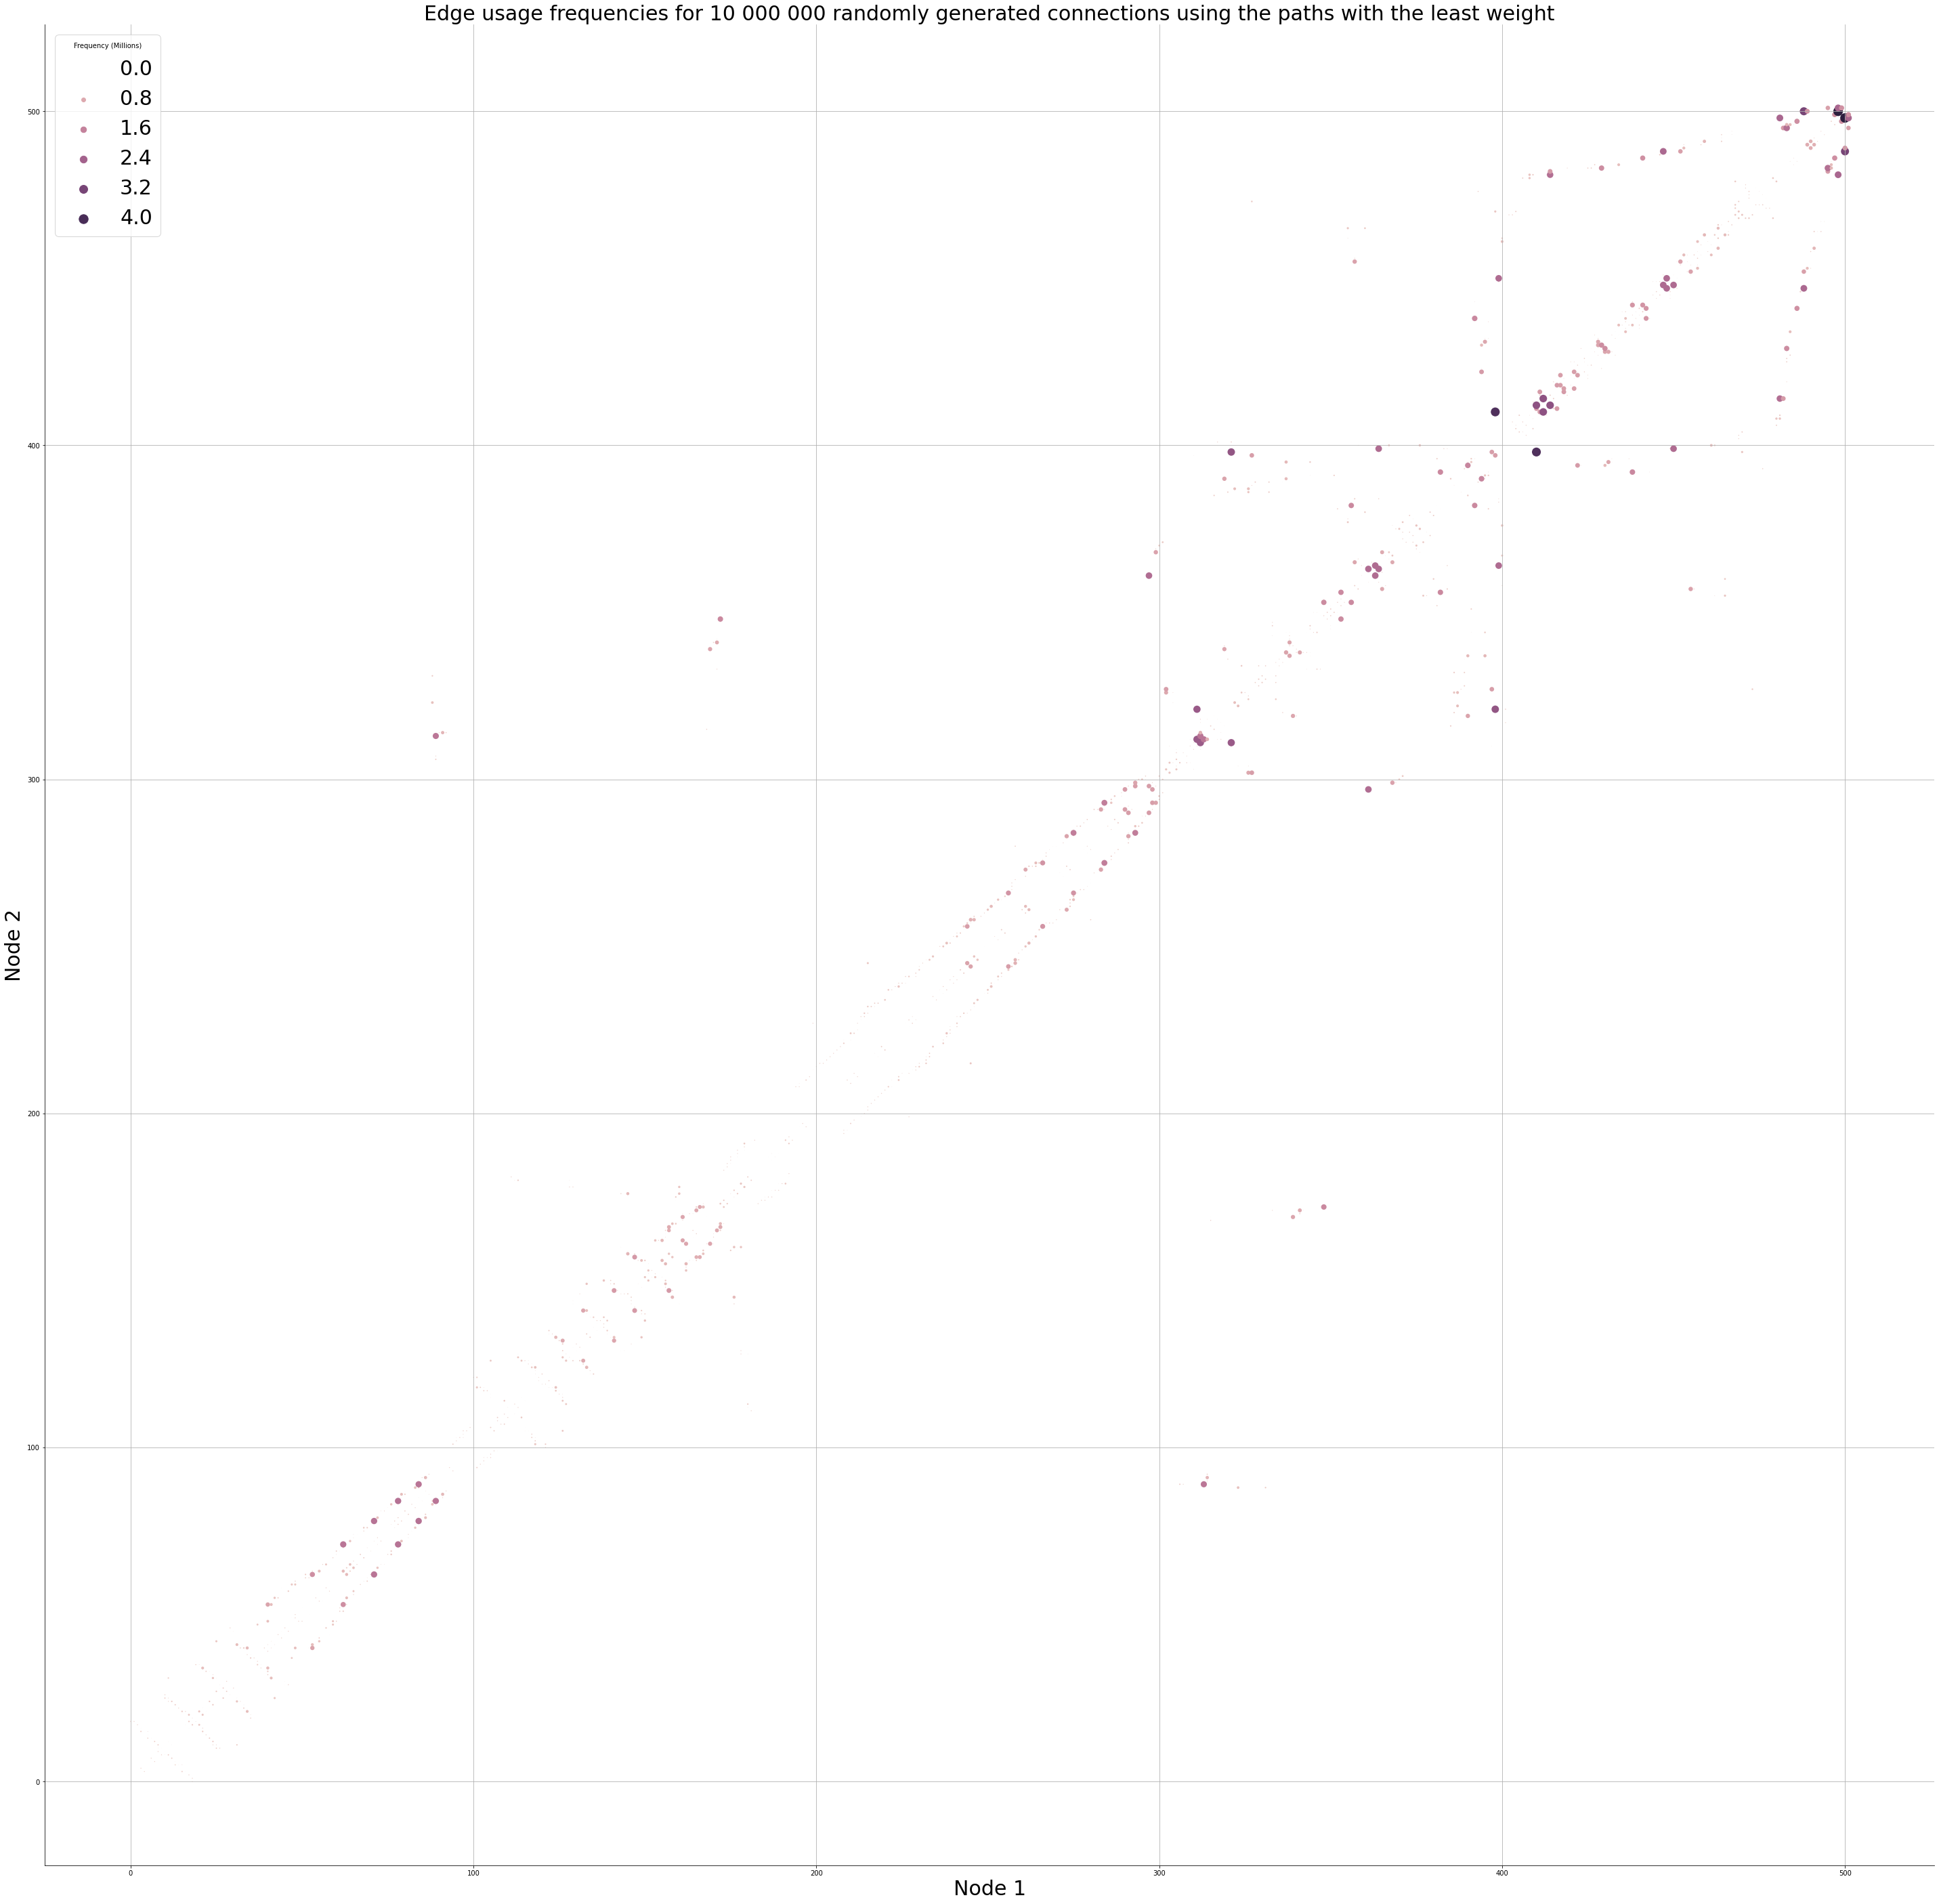

In [49]:
X = []
Y = []
Z = []

for key in shortest_random_paths_2_ef:
    for key2 in shortest_random_paths_2_ef:
        X.append(key)
        Y.append(key2)
        Z.append(shortest_random_paths_2_ef[key][key2])

fig, ax = plt.subplots(figsize=(50, 50))
sns.scatterplot(x=X, 
                y=Y, 
                size=Z, 
                ax=ax, 
                sizes=(0, 200), 
                hue=Z)
ax.grid(axis='y')
ax.grid(axis='x')

plt.ylabel("Node 2", fontsize=30);
plt.xlabel("Node 1", fontsize=30);
plt.title("Edge usage frequencies for 10 000 000 randomly generated connections using the paths with the least weight",
          fontsize=30);

sns.despine()
plt.legend(loc=2, title="Frequency (Millions)", prop={'size': 30}, fontsize=30);

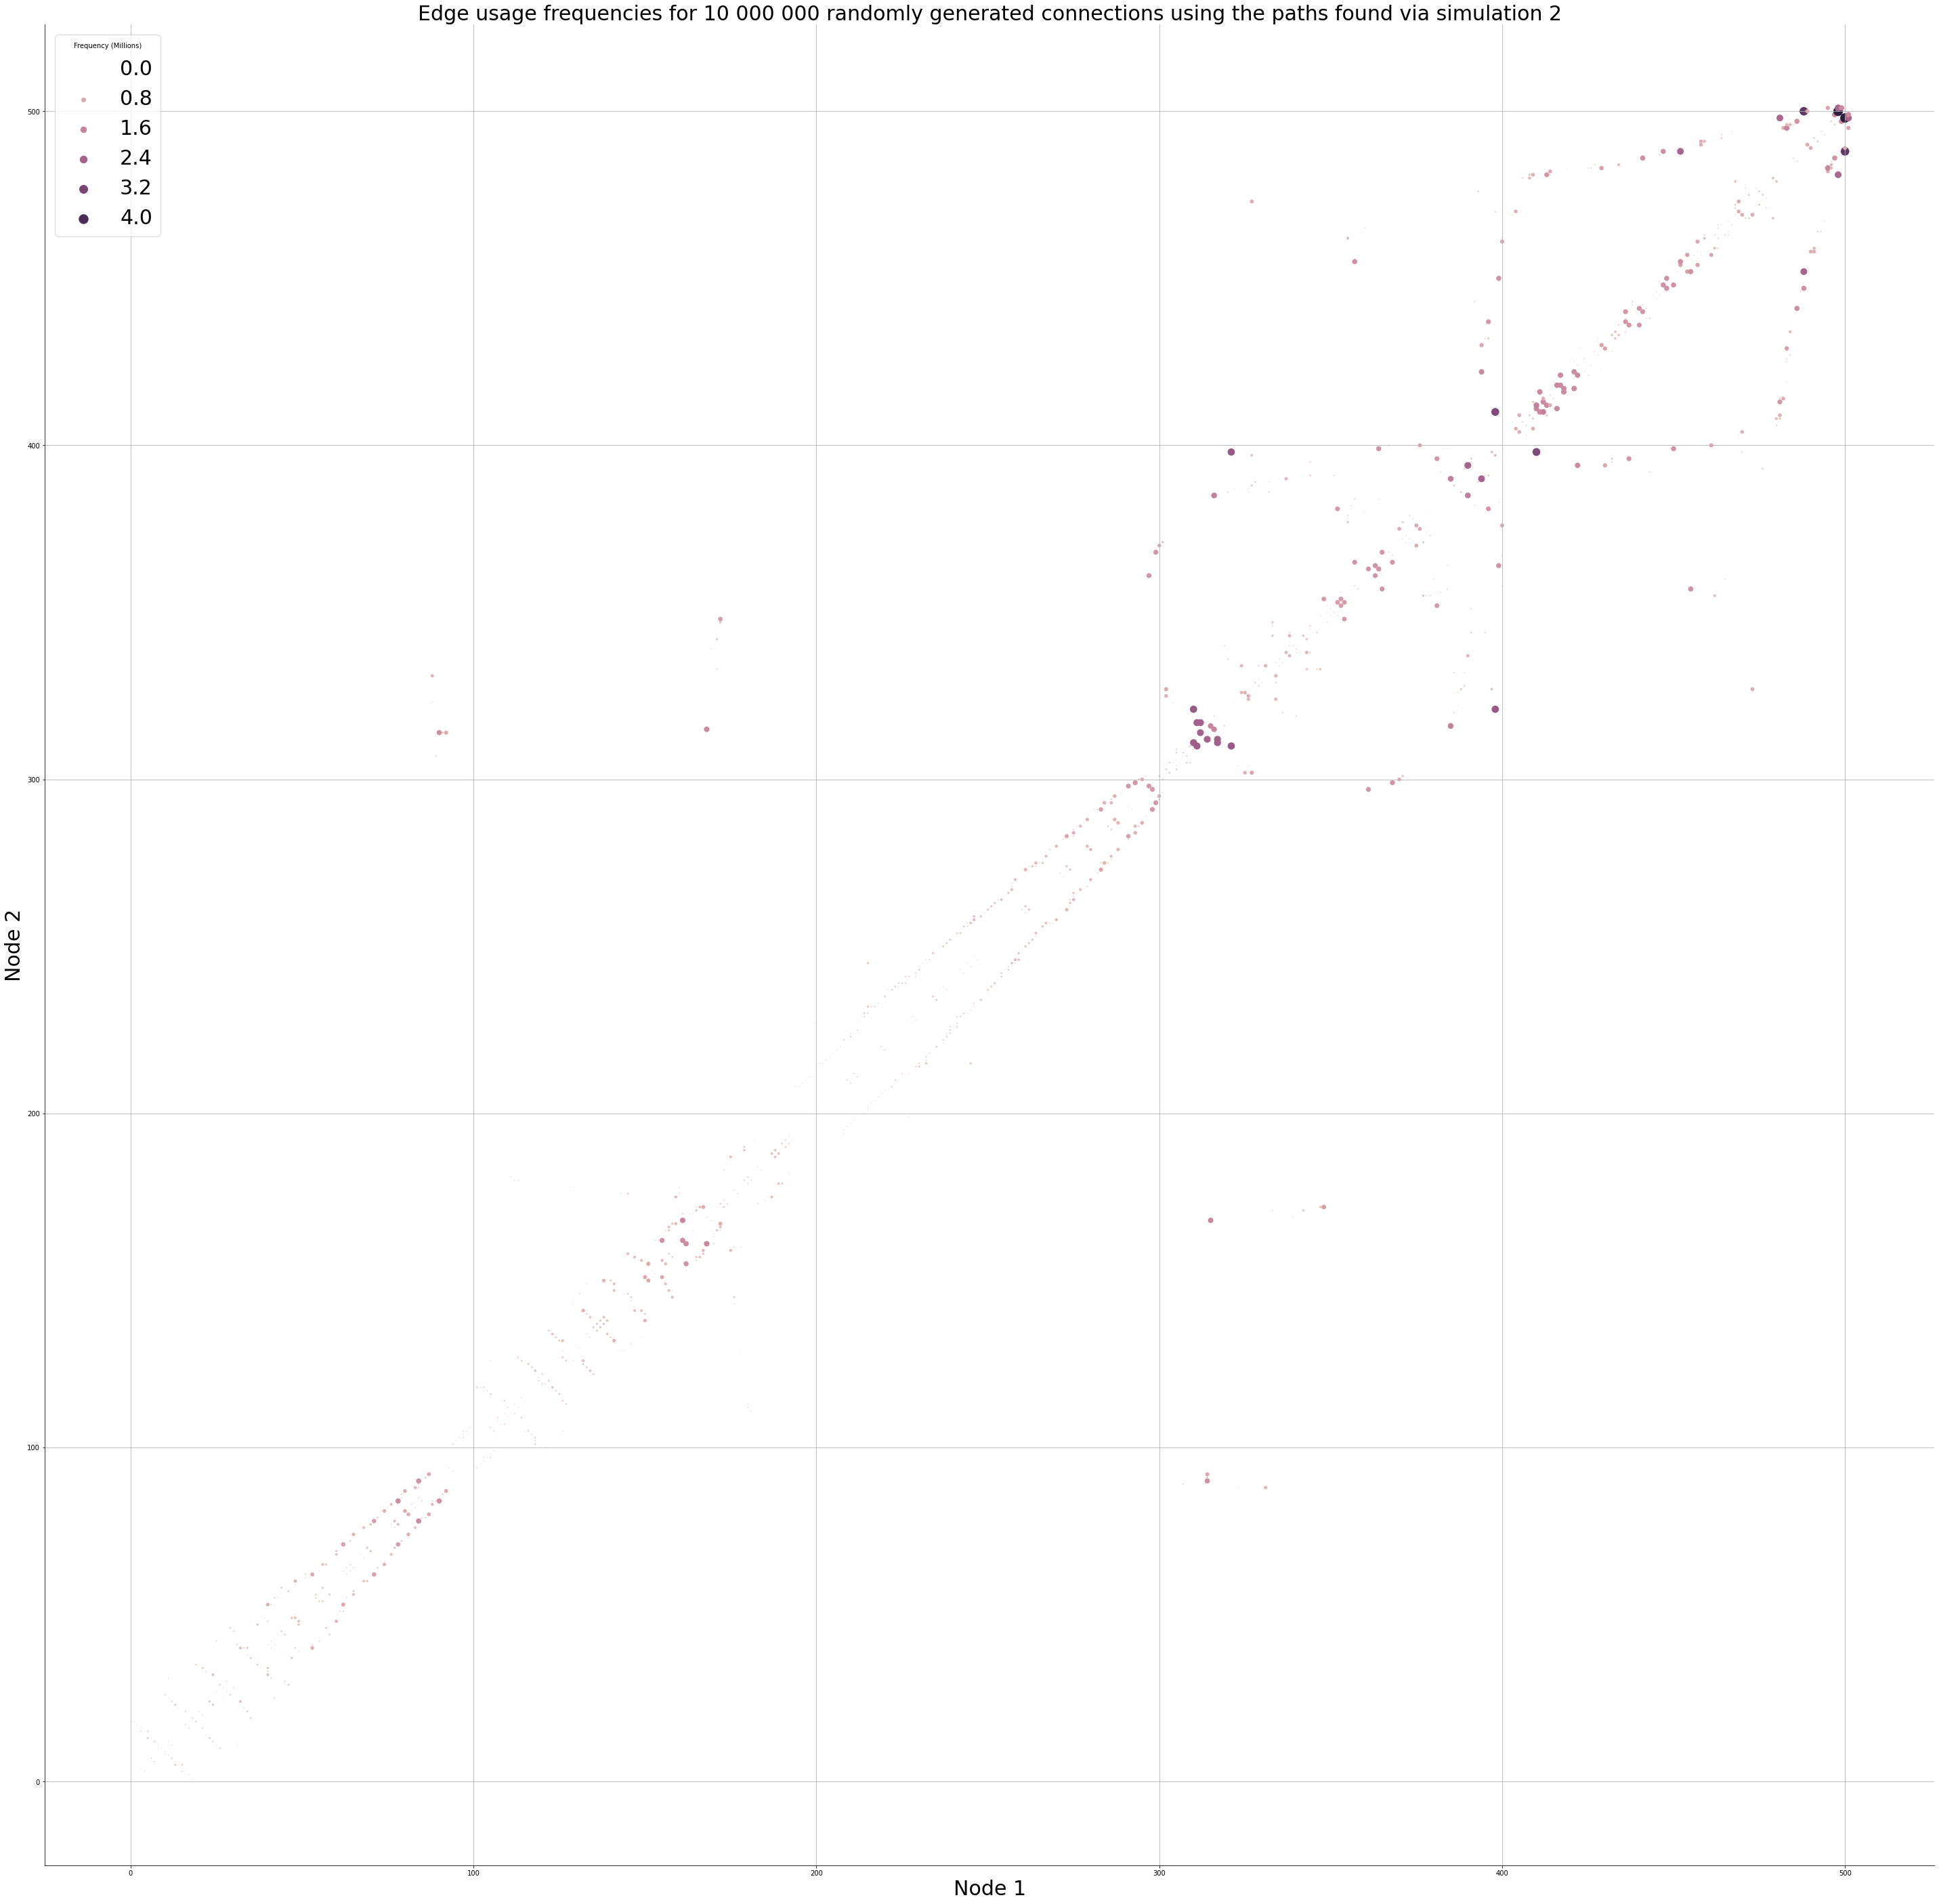

In [50]:
X = []
Y = []
Z = []

for key in simulation_random_paths_2_ef:
    for key2 in simulation_random_paths_2_ef:
        X.append(key)
        Y.append(key2)
        Z.append(simulation_random_paths_2_ef[key][key2])

fig, ax = plt.subplots(figsize=(50, 50))
sns.scatterplot(x=X, 
                y=Y, 
                size=Z, 
                ax=ax, 
                sizes=(0, 200), 
                hue=Z)

plt.ylabel("Node 2", fontsize=30);
plt.xlabel("Node 1", fontsize=30);
plt.title("Edge usage frequencies for 10 000 000 randomly generated connections using the paths found via simulation 2",
          fontsize=30);

ax.grid(axis='y')
ax.grid(axis='x')
sns.despine()
plt.legend(loc=2, title="Frequency (Millions)", prop={'size': 30}, fontsize=30);

In [51]:
simulation_frequency_list_2 = []
for node_1 in weight_graph:
    for node_2 in weight_graph:
        if node_1 < node_2:
            path_frequency = simulation_random_paths_2_ef[node_1][node_2]
            if path_frequency > 0:
                simulation_frequency_list_2.append(path_frequency)
simulation_frequency_list_2.sort(reverse=True)

short_frequency_list_2 = []
for node_1 in weight_graph:
    for node_2 in weight_graph:
        if node_1 < node_2:
            path_frequency = shortest_random_paths_2_ef[node_1][node_2]
            if path_frequency > 0:
                short_frequency_list_2.append(path_frequency)
short_frequency_list_2.sort(reverse=True)

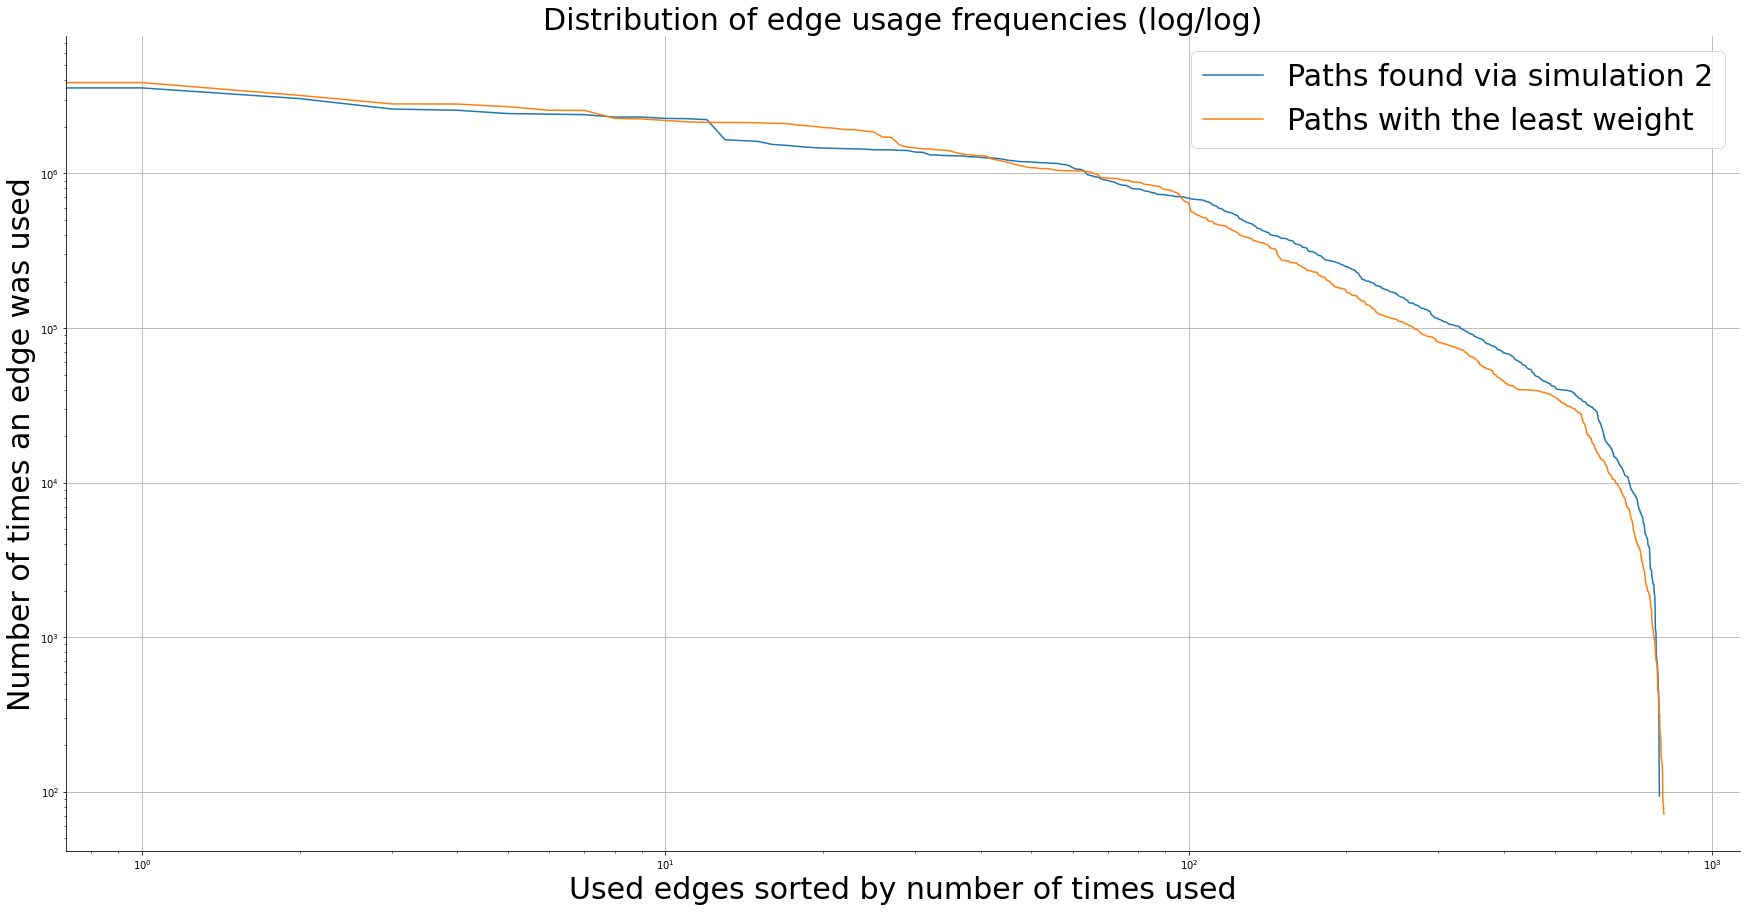

In [52]:
fig, ax = plt.subplots(figsize=(30, 15))

simulation_2_x = list(range(len(simulation_frequency_list_2)))
plt.loglog(simulation_2_x, simulation_frequency_list_2, label = "Paths found via simulation 2");

shortest_2_x = list(range(len(short_frequency_list_2)))
plt.loglog(shortest_2_x, short_frequency_list_2, label = "Paths with the least weight");

plt.ylabel("Number of times an edge was used", fontsize=30);
plt.xlabel("Used edges sorted by number of times used", fontsize=30);
plt.title("Distribution of edge usage frequencies (log/log)", fontsize=30);

ax.grid(axis='y')
ax.grid(axis='x')
sns.despine()

plt.legend(prop={'size': 30});
plt.show();

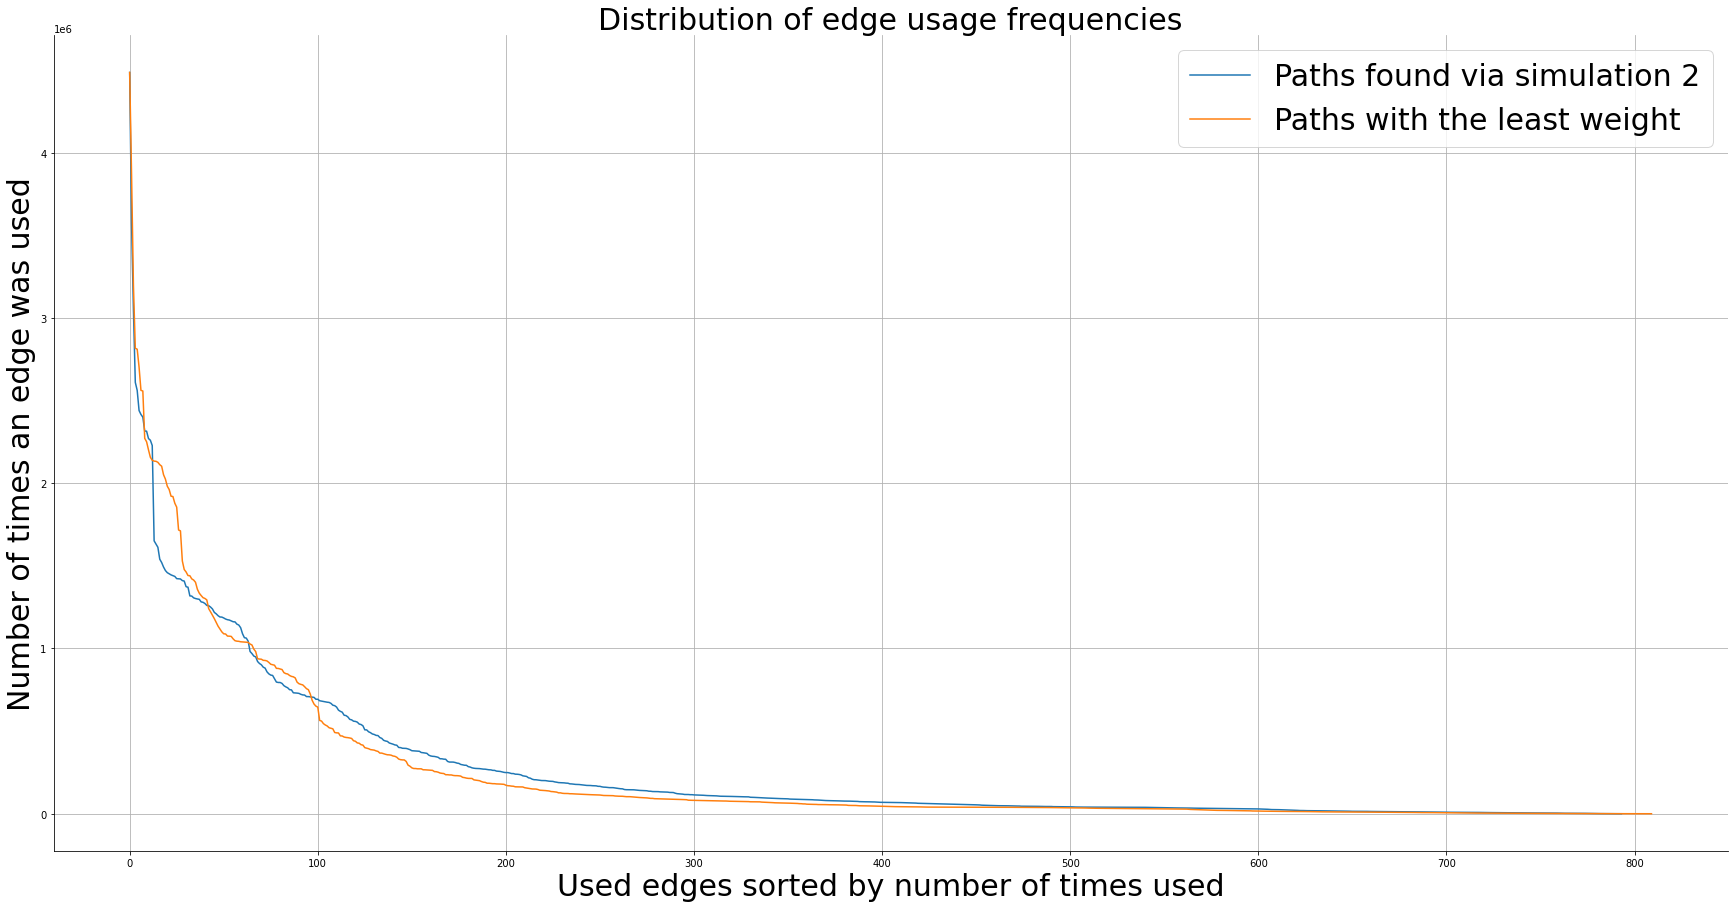

In [53]:
fig, ax = plt.subplots(figsize=(30, 15))

simulation_2_x = list(range(len(simulation_frequency_list_2)))
plt.plot(simulation_2_x, simulation_frequency_list_2, label = "Paths found via simulation 2");

shortest_2_x = list(range(len(short_frequency_list_2)))
plt.plot(shortest_2_x, short_frequency_list_2, label = "Paths with the least weight");

plt.ylabel("Number of times an edge was used", fontsize=30);
plt.xlabel("Used edges sorted by number of times used", fontsize=30);
plt.title("Distribution of edge usage frequencies", fontsize=30);

ax.grid(axis='y')
ax.grid(axis='x')
sns.despine()

plt.legend(prop={'size': 30});
plt.show();